Status code: 200
id: 43360642	status: 200
id: 43358980	status: 200
id: 43356314	status: 200
id: 43356995	status: 200
id: 43352531	status: 200
id: 43357739	status: 200
id: 43360024	status: 200
id: 43358947	status: 200
id: 43360653	status: 200
id: 43358999	status: 200


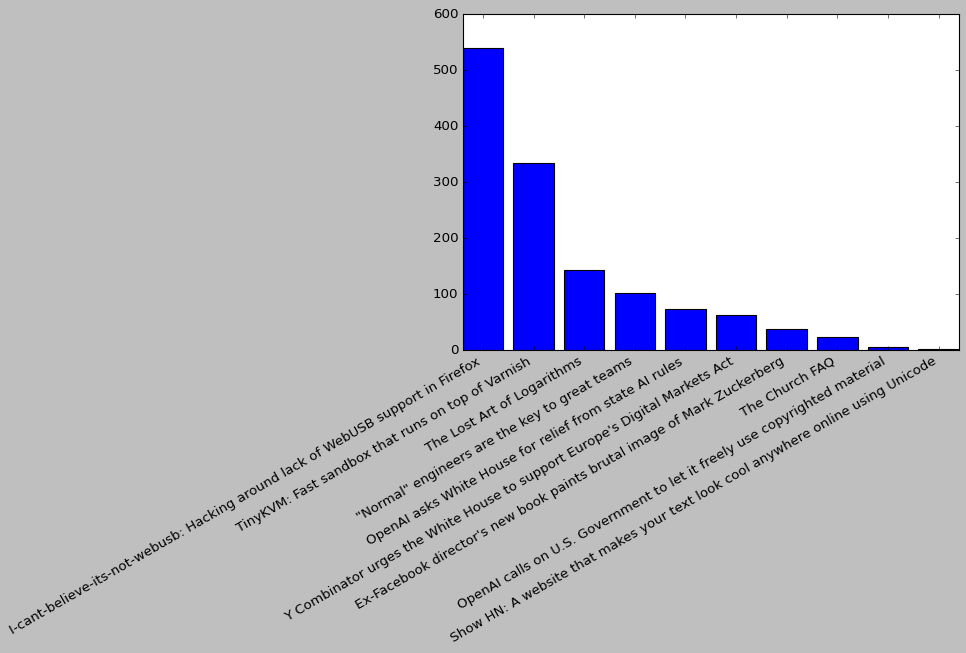

In [5]:
import requests
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import json
from operator import itemgetter

pio.renderers.default = "browser"

url ="https://hacker-news.firebaseio.com/v0/topstories.json"

r = requests.get(url)

print(f"Status code: {r.status_code}")

submission_ids = r.json()

titles, comments = [], []

submission_dicts = []

for submission_id in submission_ids[:10]:
    url = f"https://hacker-news.firebaseio.com/v0/item/{submission_id}.json"
    r= requests.get(url)
    print(f"id: {submission_id}\tstatus: {r.status_code}")
    response_dict = r.json()
    submission_dict = {
        'title': response_dict['title'],
        'hn_link': f"https//news.ycombinator.com/item?id={submission_id}",
        'comments': response_dict['descendants'] 
    }
    submission_dicts.append(submission_dict)
    titles.append(response_dict['title'])
    comments.append(response_dict['descendants'])
    
plt.style.use("classic")
fig, ax = plt.subplots()
ax.bar(titles, sorted(comments, reverse=True))
fig.autofmt_xdate()
plt.show()

In [ ]:
url = "https://api.github.com/search/repositories?q=language:python+sort:stars"
url += "?q=language:python+sort:stars+stars:>10000"
headers = {"Accept" : "application/vnd.github.v3+json"}
r = requests.get(url, headers=headers)
print((f"Status code: {r.status_code}"))


response_dict = r.json()
print(f"Complete results: {response_dict['incomplete_results']}")

repo_dicts = response_dict['items']

repo_names, stars, repo_links = [], [], [] #Name in active Links konvertieren!

for repo_dict in repo_dicts:
    repo_name = repo_dict['name']
    repo_url = repo_dict['html_url']
    repo_link = f"<a href='{repo_url}'>{repo_name}</a>"
    repo_names.append(repo_name)
    repo_links.append(repo_link)
    stars.append(repo_dict['stargazers_count'])

 
title = "Most_starred Python projects on GitHub"
labels = {'x': 'Repository', 'y': 'Stars'}  
fig = go.Figure(data=[go.Bar(x=repo_names, y=stars, hovertext=repo_links)]) 
# fig = px.bar(x=repo_names, y=stars, title=title, labels=labels, hover_name=repo_links)
fig.update_layout(title_text=title, title_font_size=28, xaxis_title_font_size=20, yaxis_title_font_size=20)
fig.show()

Status code: 200
Complete results: False
